# Time Series Prediction using ML

In this Project I have used various supervised learning-based models to predict the stock price of Ashokley using correlated assets and its own historical data.
This can also be used as a model to select the best ML model for a particular asset.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Creating the dataset

In [2]:
hcolumns = ['myCompany_pred','competitor1_lag_returns','competitor2_lag_returns','competitor3_lag_returns','NIFTY_lag_returns','myCompany_lr_1','myCompany_lr_2','myCompany_lr_5','myCompany_lr_10']
df = pd.DataFrame(columns = hcolumns)
df

,myCompany_pred,competitor1_lag_returns,competitor2_lag_returns,competitor3_lag_returns,NIFTY_lag_returns,myCompany_lr_1,myCompany_lr_2,myCompany_lr_5,myCompany_lr_10


In [3]:
myCompany= yf.download('ASHOKLEY.NS',start='2014-01-01')
myCompany=myCompany['Close']

comp1= yf.download('TATAMOTORS.NS',start='2014-01-01')
comp1=comp1['Close']

comp2= yf.download('MARUTI.NS',start='2014-01-01')
comp2=comp2['Close']

comp3= yf.download('M&M.NS',start='2014-01-01')
comp3=comp3['Close']

nifty= yf.download('^NSEI',start='2014-01-01')
nifty=nifty['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
df['myCompany_pred']=myCompany
df['myCompany_pred'] = np.log(df['myCompany_pred']).diff()#log returns

df['competitor1_lag_returns']=comp1.shift()
df['competitor1_lag_returns'] = np.log(df['competitor1_lag_returns']).diff()

df['competitor2_lag_returns']=comp2.shift()
df['competitor2_lag_returns'] = np.log(df['competitor2_lag_returns']).diff()

df['competitor3_lag_returns']=comp3.shift()
df['competitor3_lag_returns'] = np.log(df['competitor3_lag_returns']).diff()

df['NIFTY_lag_returns']=nifty.shift()
df['NIFTY_lag_returns'] = np.log(df['NIFTY_lag_returns']).diff()

In [5]:
df['myCompany_lr_1']=df['myCompany_pred'].shift(1).dropna()
df['myCompany_lr_2']=df['myCompany_pred'].shift(2).dropna()
df['myCompany_lr_5']=df['myCompany_pred'].shift(5).dropna()
df['myCompany_lr_10']=df['myCompany_pred'].shift(10).dropna()
df=df.dropna()


In [6]:
df

,myCompany_pred,competitor1_lag_returns,competitor2_lag_returns,competitor3_lag_returns,NIFTY_lag_returns,myCompany_lr_1,myCompany_lr_2,myCompany_lr_5,myCompany_lr_10
Date,,,,,,,,,
2014-01-16,-0.014599,0.014685,0.014972,0.015424,0.012585,-0.008658,0.017392,-0.019364,0.031476
2014-01-17,-0.008863,-0.020214,-0.005710,-0.013630,-0.000316,-0.014599,-0.008658,-0.039891,0.062776
2014-01-20,-0.002972,-0.000135,-0.008219,0.007700,-0.009101,-0.008863,-0.014599,-0.005831,-0.010638
2014-01-21,0.000000,0.013968,0.001689,0.007972,0.006733,-0.002972,-0.008863,0.017392,-0.018894
2014-01-22,0.026433,0.026064,0.013240,-0.003480,0.001561,0.000000,-0.002972,-0.008658,-0.005465
...,...,...,...,...,...,...,...,...,...
2021-10-05,0.018314,0.025768,0.001116,0.015938,0.009039,-0.006907,-0.023059,-0.005768,0.014286
2021-10-06,-0.018314,0.008589,0.012191,0.002256,0.007380,0.018314,-0.006907,-0.002317,0.010972
2021-10-07,0.045171,-0.026140,-0.008162,-0.010673,-0.009941,-0.018314,0.018314,0.033824,0.004278


# Correlation Matrix

Using a heat map and scatter plot ,the correlation of price movement of Ashokley with the its related assets can be observed 
visually. 

Related Assets:
1)MARUTI
2)TATAMOTORS
3)MAHINDRA
4)NIFTY50

<AxesSubplot:title={'center':'Correlation Matrix'}>

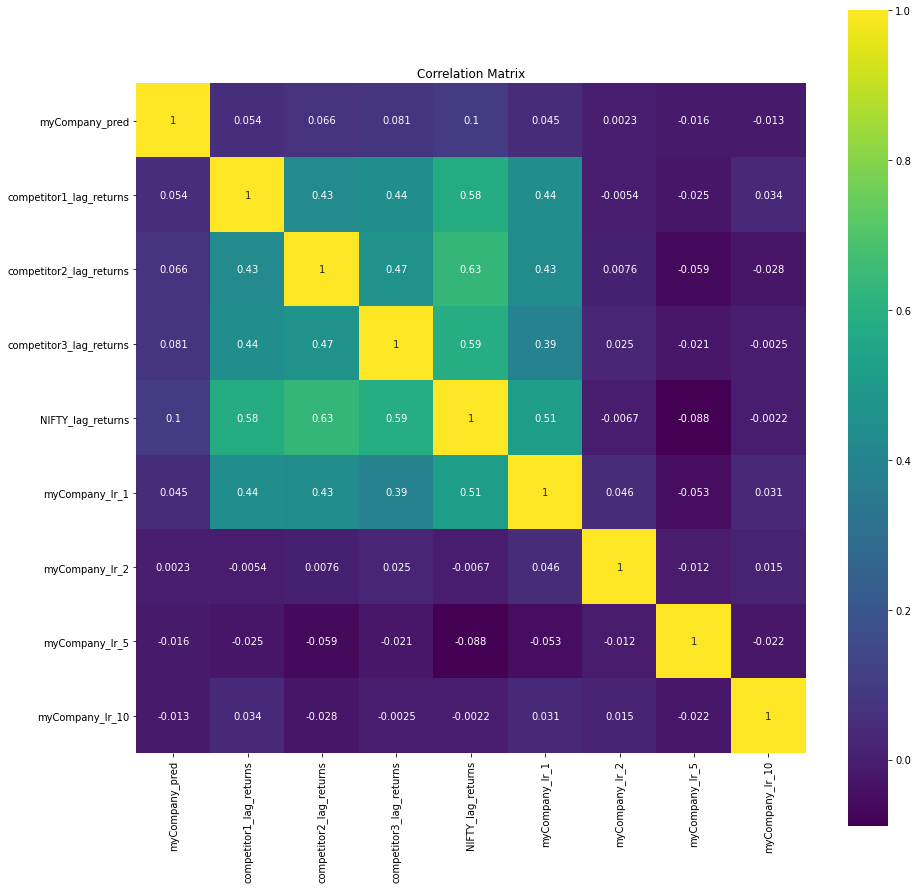

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

<Figure size 1080x1080 with 0 Axes>

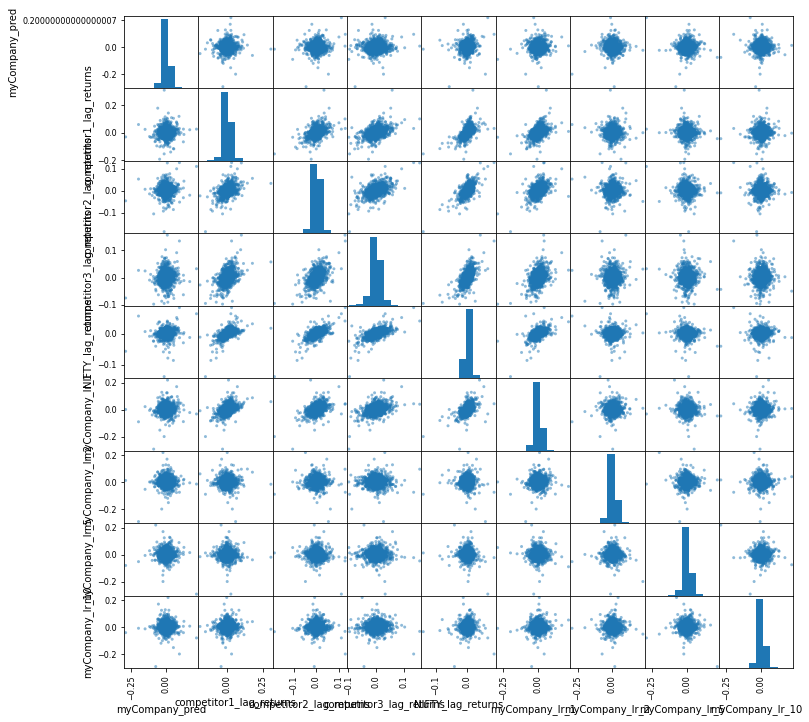

In [8]:
from pandas.plotting import scatter_matrix
plt.figure(figsize=(15,15))
scatter_matrix(df,figsize=(12,12))
plt.show()

# Time-Series Analysis

The seasonal decomposition of the time series can be observed using the method below.

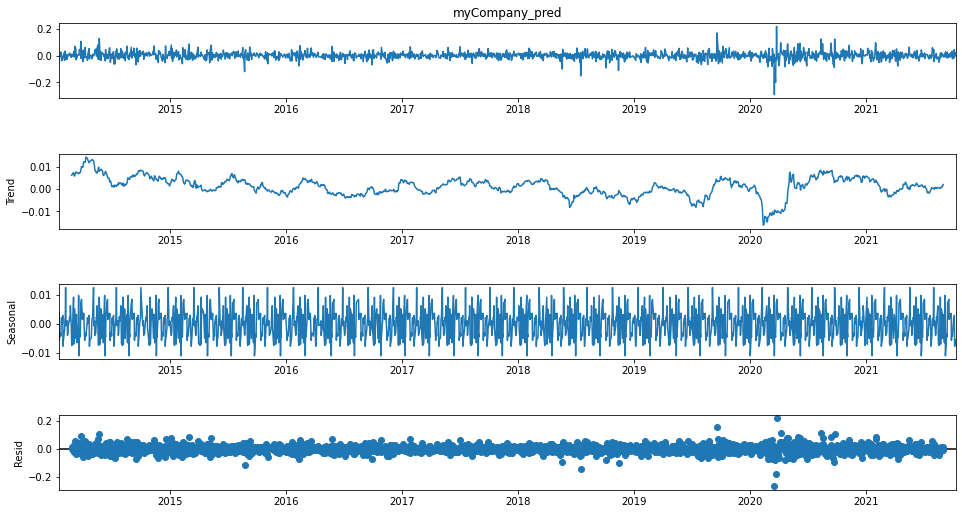

In [9]:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df['myCompany_pred'],freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()


# Feature Selection for Data Preparation
We use sklearn's SelectKBest function to get a sense of feature importance.

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
bestfeatures = SelectKBest(k=5, score_func=f_regression)
X=df.copy()
X=X.drop(['myCompany_pred'], axis = 1)
fit = bestfeatures.fit(X,df['myCompany_pred'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(10,'Score').set_index('Specs')  #print 10 best feat

,Score
Specs,
NIFTY_lag_returns,20.129921
competitor3_lag_returns,12.504761
competitor2_lag_returns,8.259705
competitor1_lag_returns,5.553946
myCompany_lr_1,3.800124
myCompany_lr_5,0.458161
myCompany_lr_10,0.305567
myCompany_lr_2,0.010171


It is observed that the previous day price of Nifty has the highest correlation with Ashokley price

# Train Test Split

In [11]:
validation_size = 0.4
Y = df['myCompany_pred']
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor


#Libraries for Deep Learning Models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import LSTM


In [13]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

# Machine Learning models-from scikit-learn
Adding all models in a list to test accuracy

In [14]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

models.append(('MLP', MLPRegressor()))



In [15]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [16]:
from sklearn.metrics import mean_squared_error
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.000567 (0.000207) 0.000559 0.001052
LASSO: 0.000568 (0.000210) 0.000567 0.001049
EN: 0.000568 (0.000210) 0.000567 0.001049
KNN: 0.000617 (0.000195) 0.000409 0.001189
CART: 0.001190 (0.000366) 0.000000 0.001921
SVR: 0.000806 (0.000365) 0.000733 0.001184
MLP: 0.000568 (0.000210) 0.000556 0.001076
ABR: 0.000608 (0.000212) 0.000478 0.001088
GBR: 0.000583 (0.000219) 0.000331 0.001175
RFR: 0.000592 (0.000230) 0.000085 0.001095
ETR: 0.000592 (0.000226) 0.000000 0.001092


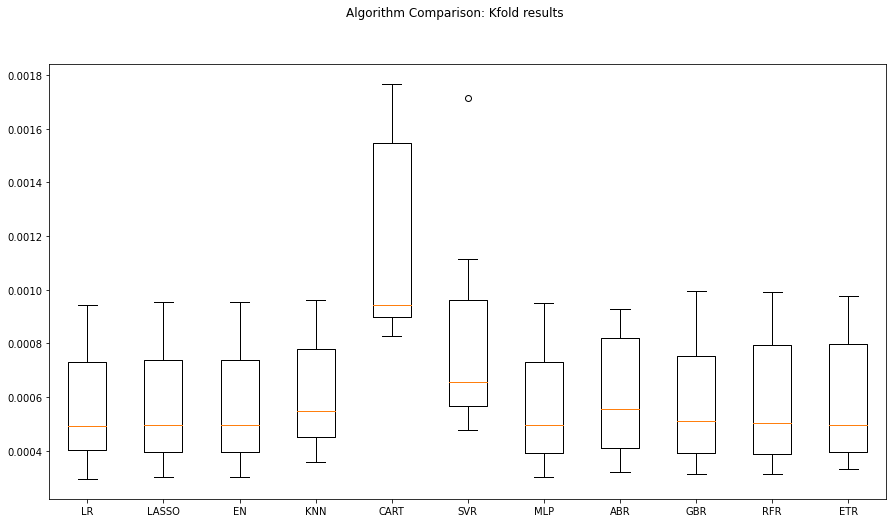

In [17]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
plt.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

We see the linear regression and the regularized regression including the Lasso regression (LASSO) and elastic net (EN) seem to do a good job.

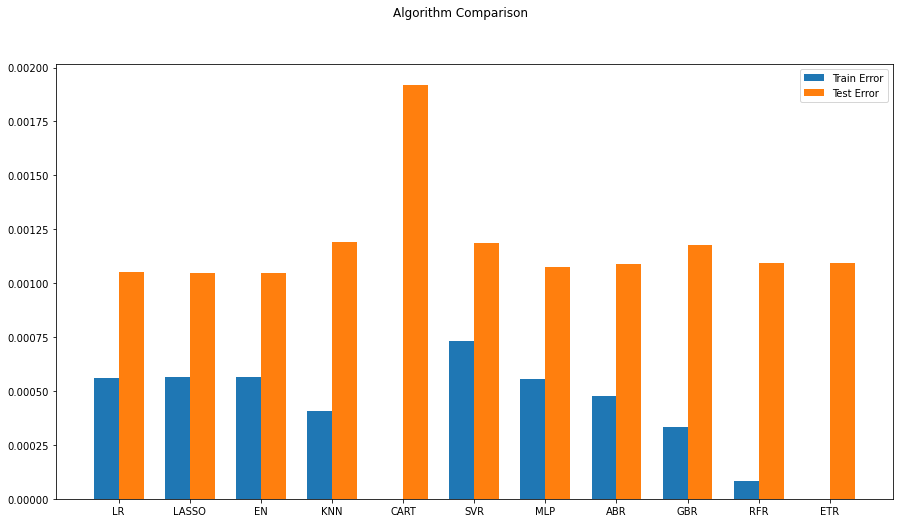

In [18]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.show()

Looking at the training and test error, we still see a better performance of the linear models. Some of the algorithms, such as the decision tree regressor (CART) overfit on the training data and produced very high error on the test set and these models should be avoided. Ensemble models, such as gradient boosting regression (GBR) and random forest regression (RFR) have low bias but high variance. We also see that the artificial neural network (shown as MLP is the chart) algorithm shows higher errors both in training set and test set, which is perhaps due to the linear relationship of the variables not captured accurately by ANN or improper hyperparameters or insuffi‐ cient training of the model.

# Adding Time-Series models
-ARIMA MODEL
-LSTM MODEL

In [19]:
from statsmodels.tsa.arima_model import ARIMA
X_train_ARIMA=X_train.loc[:, ['competitor1_lag_returns','competitor2_lag_returns','competitor3_lag_returns','NIFTY_lag_returns']]
X_test_ARIMA=X_test.loc[:, ['competitor1_lag_returns','competitor2_lag_returns','competitor3_lag_returns','NIFTY_lag_returns']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [20]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

C:\Users\nilay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [21]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

C:\Users\nilay\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


0.0010388682628419122

In [22]:
from tensorflow.keras.layers import LSTM
seq_len=2
Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [23]:
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

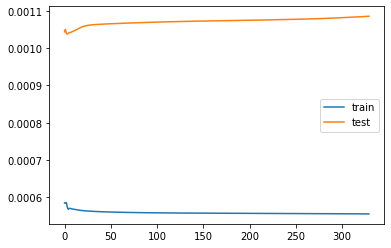

In [24]:
plt.plot(LSTMModel_fit.history['loss'], label='train')
plt.plot(LSTMModel_fit.history['val_loss'], label='test')
plt.legend()
plt.show()

In [25]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

In [26]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

# Overall Comparison of all the algorithms ( including Time Series Algorithms)

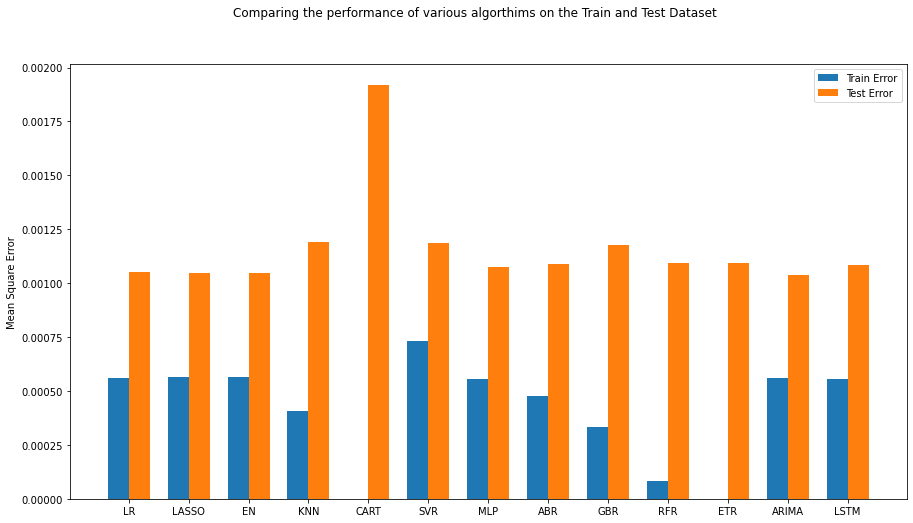

In [27]:
# compare algorithms
fig = plt.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
plt.bar(ind - width/2, train_results,  width=width, label='Train Error')
plt.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
plt.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
plt.ylabel('Mean Square Error')
plt.show()

CHOOSE THE BEST MODEL:
Looking at the chart above, we find time series based ARIMA model comparable to the linear supervised-regression models such as Linear Regression (LR), Lasso Regres‐ sion (LASSO) and Elastic Net (EN). This can primarily be due to the strong linear relationship as discussed before. The LSTM model performs decently, however, ARIMA model outperforms the LSTM model in the test set. Hence, we select the ARIMA model for the model tuning.

# Arima Model
As shown in the chart above the ARIMA model is one of the best mode, so we perform the model tuning of the ARIMA model. The default order of ARIMA model is [1,0,0]. We perform a grid search with different combination p,d and q in the ARIMA model's order.

In [28]:
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=0.0005622
ARIMA(0, 0, 1) MSE=0.0005618
ARIMA(1, 0, 0) MSE=0.0005618
ARIMA(1, 0, 1) MSE=0.0005613
ARIMA(2, 0, 0) MSE=0.0005609
ARIMA(2, 0, 1) MSE=0.0005572
Best ARIMA(2, 0, 1) MSE=0.0005572


# Results

In [29]:
# prepare model
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [30]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0010388682628419122


In [31]:
predicted_tuned

1129    0.004023
1130   -0.001514
1131   -0.002075
1132    0.002021
1133    0.004987
          ...   
1878    0.004793
1879    0.003496
1880   -0.001498
1881    0.009503
1882    0.003532
Length: 754, dtype: float64

In [32]:
qtm1= yf.download('TATAMOTORS.NS',start='2014-01-01')
qtm=qtm1['Close']
qtm=qtm.tail(5)
qmaruti1= yf.download('MARUTI.NS',start='2014-01-01')
qmaruti=qmaruti1['Close']
qmaruti=qmaruti.tail(5)
qmahindra1= yf.download('M&M.NS',start='2014-01-01')
qmahindra=qmahindra1['Close']
qmahindra=qmahindra.tail(5)
qnifty1= yf.download('^NSEI',start='2014-01-01')
qnifty=qnifty1['Close']
qnifty=qnifty.tail(5)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
qcolumns = ['competitor1_lag_returns','competitor2_lag_returns','competitor3_lag_returns','NIFTY_lag_returns']
qf = pd.DataFrame(columns = qcolumns)

qf['competitor1_lag_returns']=qtm
qf['competitor1_lag_returns'] = np.log(qf['competitor1_lag_returns']).diff()

qf['competitor3_lag_returns']=qmahindra
qf['competitor3_lag_returns'] = np.log(qf['competitor3_lag_returns']).diff()

qf['competitor2_lag_returns']=qmaruti
qf['competitor2_lag_returns'] = np.log(qf['competitor2_lag_returns']).diff()

qf['NIFTY_lag_returns']=qnifty
qf['NIFTY_lag_returns'] = np.log(qf['NIFTY_lag_returns']).diff()
qf=qf.tail(1)

# Feeding latest data into the model and getting expected returns

In [34]:
qf

,competitor1_lag_returns,competitor2_lag_returns,competitor3_lag_returns,NIFTY_lag_returns
Date,,,,
2021-10-11,0.087816,0.038347,0.02041,0.007574


In [35]:
X_train_ARIMA=X.loc[:, ['competitor1_lag_returns','competitor2_lag_returns','competitor3_lag_returns','NIFTY_lag_returns']]
X_train_ARIMA

,competitor1_lag_returns,competitor2_lag_returns,competitor3_lag_returns,NIFTY_lag_returns
Date,,,,
2014-01-16,0.014685,0.014972,0.015424,0.012585
2014-01-17,-0.020214,-0.005710,-0.013630,-0.000316
2014-01-20,-0.000135,-0.008219,0.007700,-0.009101
2014-01-21,0.013968,0.001689,0.007972,0.006733
2014-01-22,0.026064,0.013240,-0.003480,0.001561
...,...,...,...,...
2021-10-05,0.025768,0.001116,0.015938,0.009039
2021-10-06,0.008589,0.012191,0.002256,0.007380
2021-10-07,-0.026140,-0.008162,-0.010673,-0.009941


In [36]:
modelARIMA_tuned=ARIMA(endog=Y,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [37]:
X_train_ARIMA = X_train_ARIMA.append(qf, ignore_index = True)

In [38]:
X_train_ARIMA

,competitor1_lag_returns,competitor2_lag_returns,competitor3_lag_returns,NIFTY_lag_returns
0,0.014685,0.014972,0.015424,0.012585
1,-0.020214,-0.005710,-0.013630,-0.000316
2,-0.000135,-0.008219,0.007700,-0.009101
3,0.013968,0.001689,0.007972,0.006733
4,0.026064,0.013240,-0.003480,0.001561
...,...,...,...,...
1879,0.008589,0.012191,0.002256,0.007380
1880,-0.026140,-0.008162,-0.010673,-0.009941
1881,0.113658,0.039926,0.051578,0.008147
1882,0.016986,-0.008377,-0.000513,0.005876


In [39]:
tmrw = model_fit_tuned.predict(start = 0 ,end = len(X_train_ARIMA)-1, exog = X_train_ARIMA)

In [40]:
tmrw

0       0.004758
1       0.000758
2      -0.000845
3       0.002898
4       0.001003
          ...   
1879    0.002455
1880   -0.001338
1881    0.003499
1882    0.002658
1883    0.004258
Length: 1884, dtype: float64

In [41]:
tmrw=np.array(tmrw)
print("Expected Returns tmrw: ",tmrw[-1]*100,"%")

Expected Returns tmrw:  0.4258472842267217 %


In [42]:
if(tmrw[-1]>0):
    print("BUY")
else:
    print("SELL")

BUY


Expected Return for tomorrow is 0.42584% which means that we would buy shares of Ashokleyland.